# SCENARIO :- 2

You are working in the customer service analytics team of a fintech company. The team wants to automatically classify user feedback as positive or negative to monitor customer sentiment.

Problem:
Given a dataset of user reviews (short text feedback), build a simple NLP-based classifier using a Support Vector Machine (SVM) model. The goal is to predict whether a review is positive or negative.

The dataset contains:

*   Review
*   Sentiment (label: Positive or Negative)

Use basic text pre-processing (like TF-IDF) and train an SVM classifier to classify sentiment. Also, evaluate your model using accuracy and confusion matrix.

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load Dataset
data = pd.read_csv('2_customer_feedback_dataset.csv')
data

,review,sentiment
0,Very user-friendly interface.,positive
1,Hservicey with the features provided.,positive
2,Really servicereciate the improvements.,positive
3,Transaction failed multiple times.,negative
4,Highly recommend this service for payments.,positive
...,...,...
145,Hard to navigate and confusing.,negative
146,Support is non-existent.,negative
147,"Great service, very satisfied!",positive
148,Fast and reliable transactions every time.,positive


In [ ]:
print("Shape :", data.shape)

Shape : (150, 2)


In [ ]:
# Missing Values
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     150 non-null    object
 1   sentiment  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


In [ ]:
print(data.describe())

                               review sentiment
count                             150       150
unique                             56         2
top     Very user-friendly interface.  positive
freq                                4        75


In [ ]:
print(data['sentiment'].value_counts())

sentiment
positive    75
negative    75
Name: count, dtype: int64


In [ ]:
print("Duplicate Values :", data.duplicated().sum())

Duplicate Values : 94


In [ ]:
data.drop_duplicates(inplace = True)
print("Duplicate Values :", data.duplicated().sum())

Duplicate Values : 0


In [ ]:
print(data['sentiment'].value_counts())

sentiment
positive    30
negative    26
Name: count, dtype: int64


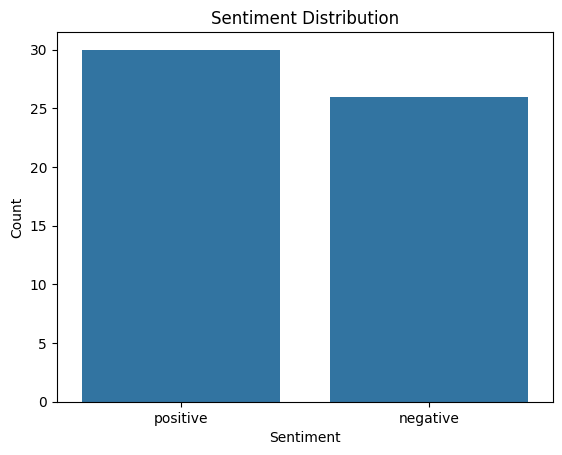

In [ ]:
sns.countplot(x = 'sentiment', data = data)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
X = data['review']
y = data['sentiment']


In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Fit and Train the model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
# Prediction
y_pred = model.predict(X_test_tfidf)


In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))

con_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", con_matrix)

Accuracy: 0.83
Confusion Matrix :
 [[6 0]
 [2 4]]


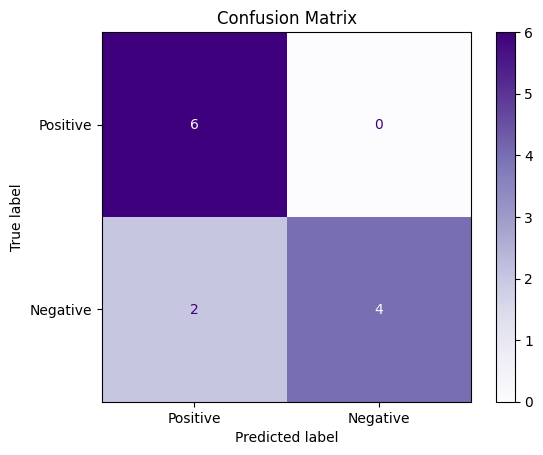

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix, display_labels = ["Positive", "Negative"])
cm_display.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def user_input(review, vectorizer, model):
  """
  Predicts the sentiment of a user input review.

  Parameters:
  review (str) : The user input review.
  vectorizer : TF-IDF Vectorizer.
  model : The trained model.
  Returns:
  label (str) : The predicted label (Positive or Negative).
  """
  review_tfidf = vectorizer.transform([review])
  prediction = model.predict(review_tfidf)
  return prediction[0].upper()

In [ ]:
review = input("Enter Review :")
result = user_input(review, vectorizer, model)
print("Sentiment :", result)

Enter Review :battery doesn't last long
Sentiment : NEGATIVE
